In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,NaN,0.0,NaN,1.0,0.2,2.0,NaN,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,NaN,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,NaN,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,NaN,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	14
float64		column 3	29
float64		column 4	29
float64		column 5	29
float64		column 6	36
float64		column 7	14
float64		column 8	28
float64		column 9	43
float64		column 10	29
float64		column 11	21
float64		column 12	35
float64		column 13	28


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,256.000000,241.000000,241.000000,241.000000,234.000000,256.000000,242.000000,227.000000,241.000000,249.000000,235.000000,242.000000
mean,0.680608,54.187500,3.203320,131.925311,249.253112,0.136752,1.031250,149.516529,0.317181,1.032365,1.582329,0.642553,4.698347
std,0.467130,8.992153,0.910671,16.725561,51.463643,0.344322,0.997546,22.158841,0.466407,1.114390,0.610930,0.910467,1.939948
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,60.250000,4.000000,140.000000,276.000000,0.000000,2.000000,164.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

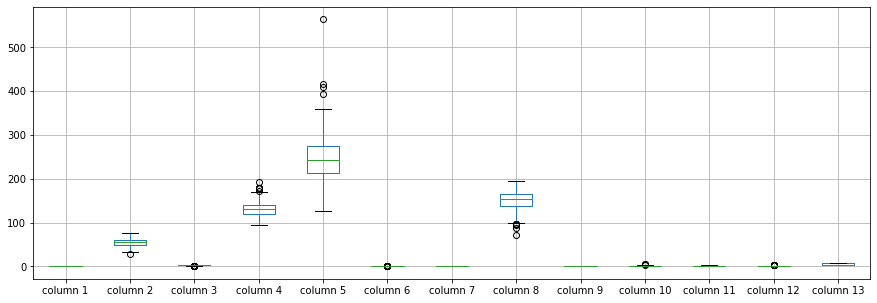

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680608
column 2      54.187500
column 3       3.203320
column 4     131.925311
column 5     249.253112
column 6       0.136752
column 7       1.031250
column 8     149.516529
column 9       0.317181
column 10      1.032365
column 11      1.582329
column 12      0.642553
column 13      4.698347
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.091667,0.067655,-0.067035,-0.240219,0.044625,0.039829,-0.096077,0.182382,0.142942,0.053579,0.107445,0.405028
column 2,-0.091667,1.000000,0.105179,0.299581,0.249726,0.186451,0.159556,-0.391233,0.179139,0.193280,0.166334,0.333918,0.143232
column 3,0.067655,0.105179,1.000000,-0.084808,0.108570,-0.134676,0.107840,-0.358878,0.420168,0.145002,0.162498,0.184658,0.220838
column 4,-0.067035,0.299581,-0.084808,1.000000,0.140623,0.126698,0.127203,-0.017510,0.078778,0.185444,0.083950,0.058636,0.117433
column 5,-0.240219,0.249726,0.108570,0.140623,1.000000,0.041119,0.145962,-0.112251,0.108472,-0.020955,-0.016213,0.112519,-0.033156
column 6,0.044625,0.186451,-0.134676,0.126698,0.041119,1.000000,0.083841,0.018328,0.016365,0.025907,-0.008621,0.099810,0.036290
column 7,0.039829,0.159556,0.107840,0.127203,0.145962,0.083841,1.000000,-0.098860,0.021774,0.128735,0.138304,0.116294,0.003305
column 8,-0.096077,-0.391233,-0.358878,-0.017510,-0.112251,0.018328,-0.098860,1.000000,-0.409621,-0.322300,-0.410906,-0.269932,-0.244362
column 9,0.182382,0.179139,0.420168,0.078778,0.108472,0.016365,0.021774,-0.409621,1.000000,0.211453,0.261022,0.204678,0.325766
column 10,0.142942,0.193280,0.145002,0.185444,-0.020955,0.025907,0.128735,-0.322300,0.211453,1.000000,0.599627,0.184164,0.304354


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+88,13+88+88,13+88+88+88,13+88+88+88+88,13+88+88+88+88+88,13+88+88+88+88,13+88+88+88,13+88+88,13+88,13], vae_layer = False, seed = 88)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 546.9127063751221
Epoch: 1 , loss: 548.0290374755859
Epoch: 2 , loss: 547.895809173584
Epoch: 3 , loss: 545.9373893737793
Epoch: 4 , loss: 545.4055976867676
Epoch: 5 , loss: 547.0646209716797
Epoch: 6 , loss: 548.1562252044678
Epoch: 7 , loss: 548.6768741607666
Epoch: 8 , loss: 545.0532035827637
Epoch: 9 , loss: 548.0301818847656
Epoch: 10 , loss: 544.7625427246094
Epoch: 11 , loss: 542.4236335754395
Epoch: 12 , loss: 544.8642425537109
Epoch: 13 , loss: 537.5729007720947
Epoch: 14 , loss: 538.8054599761963
Epoch: 15 , loss: 536.85862159729
Epoch: 16 , loss: 534.2775135040283
Epoch: 17 , loss: 534.7492008209229
Epoch: 18 , loss: 530.9318923950195
Epoch: 19 , loss: 520.7229919433594
Epoch: 20 , loss: 497.1830749511719
Epoch: 21 , loss: 453.01732635498047
Epoch: 22 , loss: 426.00295066833496
Epoch: 23 , loss: 404.1267738342285
Epoch: 24 , loss: 390.62281608581543
Epoch: 25 , loss: 378.30078125
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.797872
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.270972,0.0,-41.026031,0.000000,0.0,0.0,-0.460403,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.908998,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,-0.741837,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
266,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-66.209229,-0.059730,0.0,0.0,0.000000,0.0
267,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.013857,0.0,0.0,0.000000,0.0
268,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1116.9593007266988, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.20628077145568277

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     155.665649
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      4.811651
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.000000,2.0,109.000000,0.000000,2.4,2.0,3.000000,3.0
1,0.0,67.0,3.0,115.0,564.0,0.000000,2.0,160.000000,0.000000,1.6,2.0,0.000000,7.0
2,1.0,57.0,2.0,124.0,261.0,0.000000,0.0,141.000000,0.000000,0.3,1.0,0.000000,7.0
3,1.0,64.0,4.0,128.0,263.0,0.270972,0.0,63.973969,1.000000,0.2,2.0,0.539597,7.0
4,0.0,74.0,2.0,120.0,269.0,0.000000,2.0,121.000000,0.091002,0.2,1.0,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,0.258163,0.0,162.000000,0.000000,0.5,1.0,0.000000,7.0
266,1.0,44.0,2.0,120.0,263.0,0.000000,0.0,106.790771,-0.059730,0.0,1.0,0.000000,7.0
267,0.0,56.0,2.0,140.0,294.0,0.000000,2.0,153.000000,-0.013857,1.3,2.0,0.000000,3.0
268,1.0,57.0,4.0,140.0,192.0,0.000000,0.0,148.000000,0.000000,0.4,2.0,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_NW_10(imp).xlsx", index=False, header=False)